# 합성곱 신경망(CNN)
##### CNN(Convolution Neural Network)

#### 1. 합성곱 연산
#### 2. 풀링 연산
#### 3. 모델 만들어보기
#### 4. 과대적합 예방하기

##  1. 합성곱 연산

1.   **완전연결층 vs 컨볼루션층** 
**완전연결층** : 인접하는 계층의 모든 뉴런과 결합되어 있고 1차원 배열 형태의 데이터를 통해 학습  
단점 : 데이터를 펼쳐서 사용하기 때문에 이미지 픽셀의 관계를 고려하지 않음 -> 데이터의 특징을 잃어버리게 됨  

**컨볼루션층** :  **필터**를 사용해서 이미지의 특징을 추출하고 학습. 각 레이어의 입출력 형상을 유지







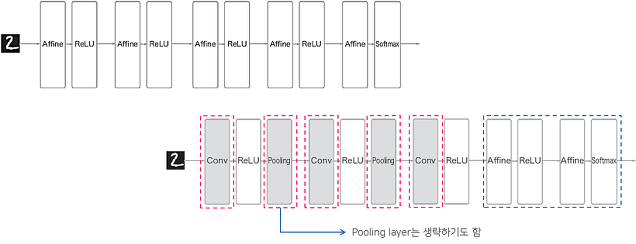


  2.   **컨볼루션 필터**  
- 완전연결 신경망의 가중치 매개변수 -> CNN의 필터 매개변수  
- 모델의 학습을 통해 필터의 파라미터가 조정됨
- 여러 개의 필터를 사용하여 다수의 특징을 학습하고 인식할 수 있음

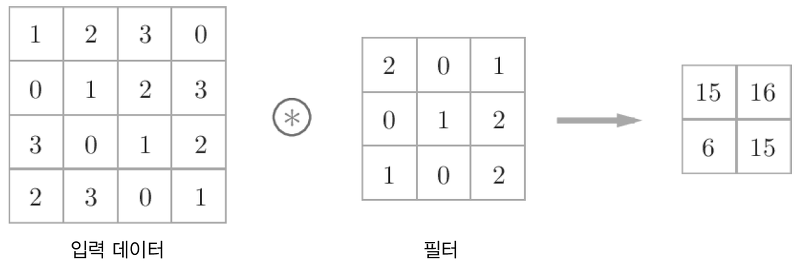



  3.   **스트라이드**  
- 필터를 적용하는 위치의 간격
- 입력데이터보다 특징맵의 크기가 감소한 형태로 출력 -> 특징맵을 다운샘플링(신경망의 파라미터 수를 감소)하는 효과

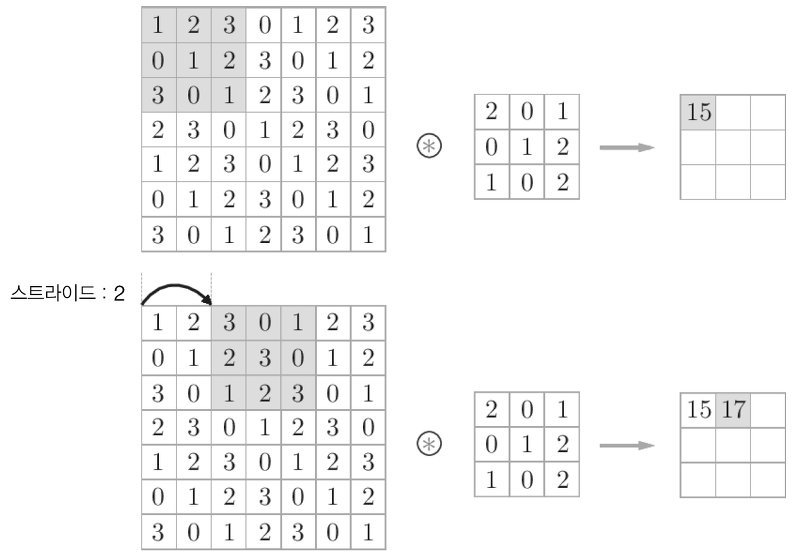




  4.   **패딩**  
*   입력 데이터 주변을 특정 값으로 채울 때 사용
*   특징맵의 크기를 조정할 목적으로 사용

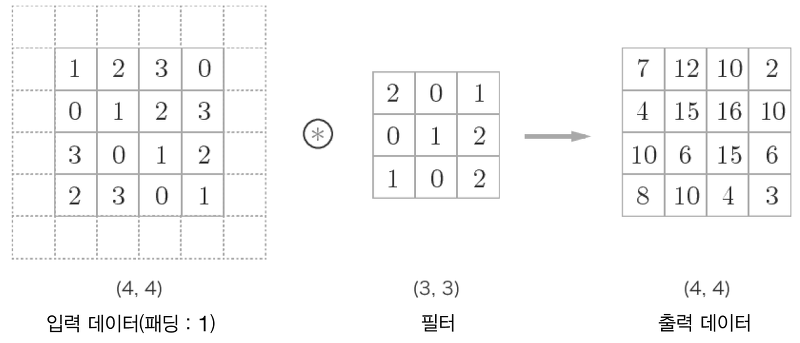






  5.   **3차원 데이터의 합성곱 연산**

*   입력 데이터의 채널 수와 필터의 채널 수가 같아야 함
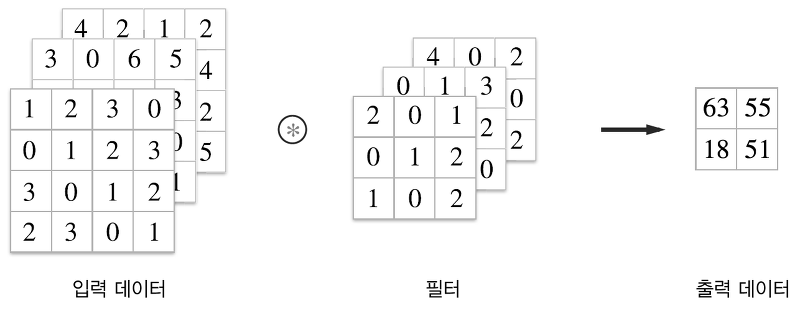





## 2. 풀링 연산


*   풀링 : 가로 세로 방향의 공간을 줄이는 연산
*   평균 풀링 : 윈도우에 속하는 값들을 평균 내어 특징값으로 사용
*   **최대 풀링** : 각 윈도우의 최대값을 이용해 특징값으로 사용


2X2 스트라이드와 2X2 윈도우를 사용한 최대 풀링
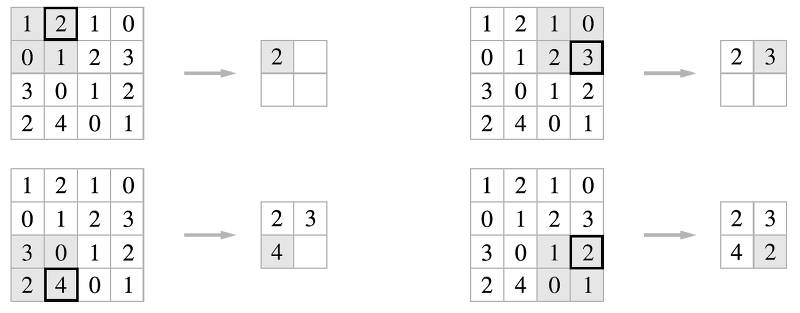

#### 최대 풀링의 특징
*   입력의 변화에 영향을 적게 받는다
*   모델 파라미터 수를 줄여준다



4423680/4422102 [==============================] - 0s 0us/step
original image shape: (28,28)
pooled image shape: (14,14)


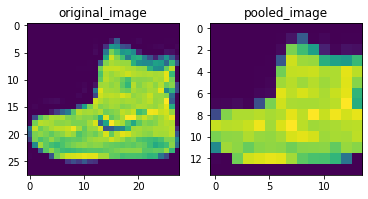

In [1]:
#풀링 구현하기

from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np

#데이터 불러오기
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

image = x_train[0]          #(28,28)크기의 이미지 입니다.
image_x = image.shape[0]    #28
image_y = image.shape[1]    #28
new_image_x = int(image_x / 2)    #14
new_image_y = int(image_y / 2)    #14

pooled_image = np.zeros((new_image_x, new_image_y))         #(14,14)크기의 0으로 채워진 데이터
print(f'original image shape: ({image_x},{image_y})')
print(f'pooled image shape: ({new_image_x},{new_image_y})')

for x in range(0, image_x, 2):
  for y in range(0, image_y,2):
    pooled_image[int(x/2), int(y/2)] = np.max(image[x:x+2, y:y+2])    #크기가 2인 스트라이드와 크기가 2인 윈도우 사용

plt.subplot(1,2,1)
plt.title('original_image')
plt.imshow(x_train[0])

plt.subplot(1,2,2)
plt.title('pooled_image')
plt.imshow(pooled_image)

## 3. 모델 만들어보기  

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

model = Sequential([
                    Conv2D(filters=16, kernel_size=3, strides=(1,1), padding='same',activation='relu', input_shape=(28,28,1)),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=32, kernel_size=3, strides=(1,1), padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=64, kernel_size=3, strides=(1,1), padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Flatten(),    #Dense층에 입력하기 위해 데이터를 펼쳐줍니다.
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')     #10개의 출력
])

Conv2D(filters, kernel_size, strides, padding, activation, input_shape)
- filters : 컨볼루션 필터 개수
- kernel_size : 필터 크기. 튜플 형태(3,3)로 지정해도 되고 숫자 하나만 넣어도 됨
- strides : 스트라이드 크기. 튜플 형태(3,3)로 지정해도 되고 숫자 하나만 넣어도 됨
- padding : 패딩에 대한 결정여부. same = 입출력의 형태 같음. valid = 사용안함
- activation : 사용할 활성화 함수. 



MaxPool2D(pool_size, strides, padding)
- pool_size : 풀링층에서 사용할 커널의 크기
- strides : 스트라이드 크기. 기본값은 None이지만 값이 주어지지 않는 경우에는 pool_size와 동일한 크기로 지정.

In [2]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 64)          18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0

### 예시1) Fashion-MNIST

In [3]:
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical       #레이블을 범주형 형태로 변경할 때 사용
from sklearn.model_selection import train_test_split    #데이터를 train과 test로 분리하기 위해 사용
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

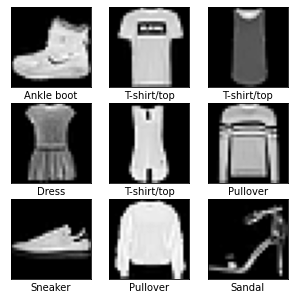

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()    #60,000개의 train데이터와 10,000개의 test데이터

np.random.seed(2020)

class_name = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


#60000개의 훈련데이터에서 임의로 9개의 데이터 추출해서 그려보기
sample_size = 9
random_idx = np.random.randint(60000, size=sample_size)

plt.figure(figsize = (5,5))
for i, idx in enumerate(random_idx):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap = 'gray')
    plt.xlabel(class_name[y_train[i]])
plt.show()

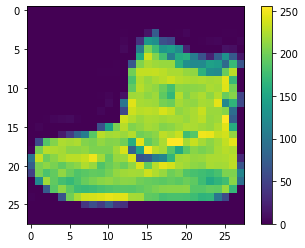

In [6]:
#픽셀 값의 범위가 0~255 사이
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

#신경망 모델에 주입하기 전에 이 값을 255로 나누어 범위를 0~1 사이로 조정
#훈련데이터와 테스트데이터 모두 전처리 해줘야 함.

In [12]:
#데이터 전처리
x_train = np.reshape(x_train/255, (-1,28,28,1))   #(60000,28,28,1)   # -1 대신 x_train.shape[0]사용해도 됨.
x_test = np.reshape(x_test/255, (-1,28,28,1))     #(10000,28,28,1)   # -1 대신 x_test.shape[0]사용해도 됨.

y_train = to_categorical(y_train)   #레이블 원-핫 인코딩
y_test = to_categorical(y_test)     #레이블 원-핫 인코딩

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=2020)

In [ ]:
model = Sequential([
                    Conv2D(filters=16, kernel_size=3, padding='same',activation='relu', input_shape=(28,28,1)),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
                    MaxPool2D(pool_size=(2,2),strides=2, padding='same'),
                    Flatten(),
                    Dense(64, activation='relu'),
                    Dense(10, activation='softmax')     #10개의 레이블이 있으므로 10개의 출력을 가진다.
])


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(x_train, y_train, epochs=30, batch_size=128, va lidation_data=(x_val, y_val))

Epoch 1/30
329/329 [==============================] - 2s 5ms/step - loss: 0.6615 - acc: 0.7620 - val_loss: 0.4563 - val_acc: 0.8337
Epoch 2/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3860 - acc: 0.8625 - val_loss: 0.3693 - val_acc: 0.8629
Epoch 3/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3303 - acc: 0.8808 - val_loss: 0.3210 - val_acc: 0.8876
Epoch 4/30
329/329 [==============================] - 2s 5ms/step - loss: 0.3020 - acc: 0.8904 - val_loss: 0.3139 - val_acc: 0.8878
Epoch 5/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2795 - acc: 0.8976 - val_loss: 0.2785 - val_acc: 0.8983
Epoch 6/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2584 - acc: 0.9050 - val_loss: 0.2995 - val_acc: 0.8963
Epoch 7/30
329/329 [==============================] - 2s 5ms/step - loss: 0.2469 - acc: 0.9096 - val_loss: 0.2837 - val_acc: 0.8973
Epoch 8/30
329/329 [==============================] - 2s 5ms/step - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3812 - acc: 0.9125

테스트 정확도: 0.9125000238418579


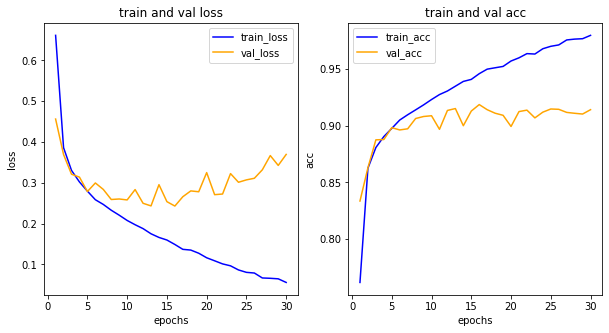

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

## 예시2) CIFAR-10

In [16]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

170500096/170498071 [==============================] - 11s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


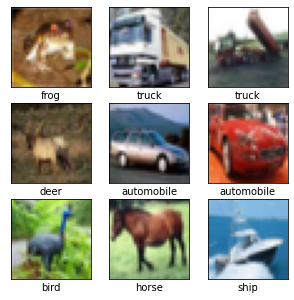

In [20]:
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2020)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog','frog', 'horse','ship','truck']

sample_size = 9
random_idx = np.random.randint(50000, size=sample_size)

plt.figure(figsize=(5,5))
for i, idx in enumerate(random_idx):
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap='gray')
  plt.xlabel(class_names[int(y_train[i])])
plt.show()

In [4]:
# 채널별로 평균과 표준편차를 구해서 표준화

x_mean = np.mean(x_train, axis=(0,1,2))
x_std = np.std(x_train, axis=(0,1,2))

x_train = (x_train - x_mean) / x_std
x_test = (x_test - x_mean) / x_std

from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3)

print(x_train.shape, len(y_train))
print(x_val.shape, len(y_val))

(35000, 32, 32, 3) 35000
(15000, 32, 32, 3) 15000


In [ ]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 8, 8, 128)        

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.6425 - acc: 0.4073 - val_loss: 1.4059 - val_acc: 0.4989
Epoch 2/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.2548 - acc: 0.5551 - val_loss: 1.1496 - val_acc: 0.5909
Epoch 3/30
1094/1094 [==============================] - 5s 5ms/step - loss: 1.0736 - acc: 0.6206 - val_loss: 1.0444 - val_acc: 0.6269
Epoch 4/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.9448 - acc: 0.6689 - val_loss: 0.9688 - val_acc: 0.6593
Epoch 5/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.8429 - acc: 0.7060 - val_loss: 0.9131 - val_acc: 0.6786
Epoch 6/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.7581 - acc: 0.7369 - val_loss: 0.8981 - val_acc: 0.6943
Epoch 7/30
1094/1094 [==============================] - 5s 5ms/step - loss: 0.6732 - acc: 0.7660 - val_loss: 0.8513 - val_acc: 0.7080
Epoch 8/30
1094/1094 [==============================] - 5s 5ms

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 1.8836 - acc: 0.7201

테스트 정확도: 0.7200999855995178


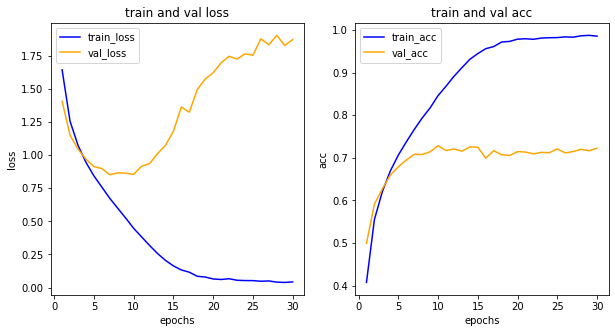

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

## 4. 과대적합 피하기
1.   규제화 함수
2.   드롭 아웃
3.   배치 정규화


###### **과대적합** : 모델이 너무 과한 학습으로 인해 훈련 데이터에만 지나치게 적응되어 그 이외의 시험 데이터에 대해서 제대로 대응하지 못하는 것
 과대적합을 방지하기 위한 방법으로 규제화 함수, 드롭아웃, 배치정규화 등이 있는데 이들은 예방책일 뿐 과대적합을 완전히 해결해 줄 수는 없다.






1.   **규제화 함수(Regularizer)**  

*   학습 과정에서 큰 가중치에 대해서는 그에 상응하는 큰 패널티를 부과하여 과대적합 억제 --> 가중치 감쇠
*   L1노름 : tensorflow.keras.regularizers.l1(l=0.01) (가중치의 절댓값 합)
*   **L2노름** : tensorflow.keras.regularziers.l2(l=0.01) (가중치의 제곱합)
*   람다 : 정규화의 세기를 조절하는 하이퍼파라미터. 크게 설정할수록 가중치에 대한 페널티가 커진다. 



In [ ]:
#L2규제화 함수 사용해보기

from tensorflow.keras.regularizers import l2

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu', kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu',kernel_regularizer=l2(0.001)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))

model.add(Flatten())
model.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 6ms/step - loss: 2.1247 - acc: 0.4039 - val_loss: 1.7972 - val_acc: 0.5075
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.6841 - acc: 0.5471 - val_loss: 1.5824 - val_acc: 0.5811
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.4948 - acc: 0.6065 - val_loss: 1.4123 - val_acc: 0.6295
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.3494 - acc: 0.6505 - val_loss: 1.3362 - val_acc: 0.6494
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2415 - acc: 0.6850 - val_loss: 1.2585 - val_acc: 0.6725
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1404 - acc: 0.7149 - val_loss: 1.2684 - val_acc: 0.6685
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0533 - acc: 0.7477 - val_loss: 1.2234 - val_acc: 0.6808
Epoch 8/30
1094/1094 [==============================] - 6s 5ms

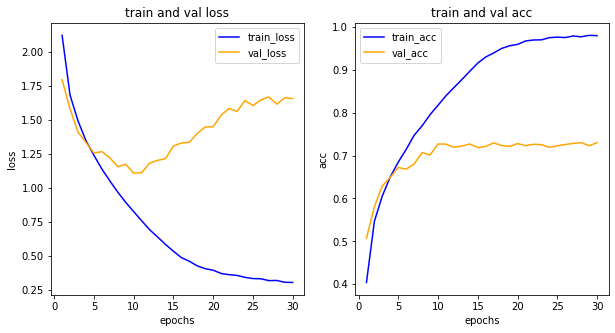

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

  2.   드롭아웃  
*  학습이 진행되는 동안 신경망의 일부 유닛을 제외(드롭)
*  훈련 때는 데이터를 흘릴 때마다 삭제할 유닛을 무작위로 선택하여 삭제
*  테스트 시에는 모든 유닛에 신호를 전달 하지만 출력값을 드롭아웃 비율만큼 줄여줌
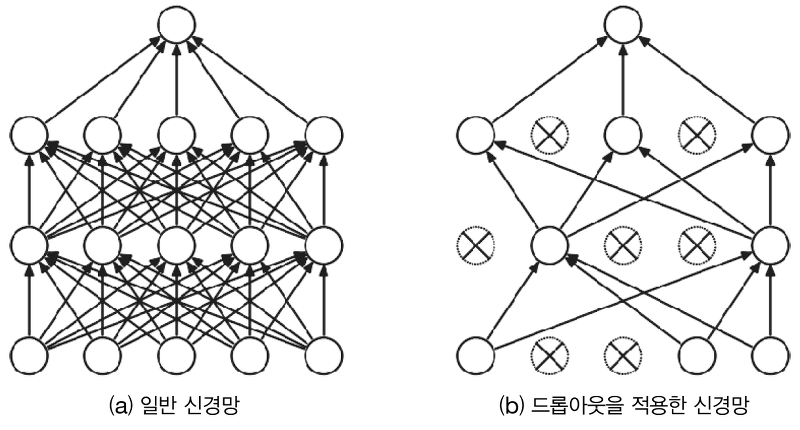



In [ ]:
from tensorflow.keras.layers import Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(filters=32, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='same'))
model.add(Dropout(0.2))  #드롭아웃 추가
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer=Adam(1e-4), loss='sparse_categorical_crossentropy', metrics=['acc'])

In [ ]:
history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.7479 - acc: 0.3615 - val_loss: 1.4563 - val_acc: 0.4687
Epoch 2/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.3899 - acc: 0.5005 - val_loss: 1.2619 - val_acc: 0.5493
Epoch 3/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.2288 - acc: 0.5621 - val_loss: 1.1185 - val_acc: 0.6009
Epoch 4/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.1096 - acc: 0.6077 - val_loss: 1.0854 - val_acc: 0.6143
Epoch 5/30
1094/1094 [==============================] - 6s 5ms/step - loss: 1.0108 - acc: 0.6426 - val_loss: 0.9530 - val_acc: 0.6648
Epoch 6/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.9317 - acc: 0.6719 - val_loss: 0.9121 - val_acc: 0.6782
Epoch 7/30
1094/1094 [==============================] - 6s 5ms/step - loss: 0.8662 - acc: 0.6951 - val_loss: 0.8429 - val_acc: 0.7029
Epoch 8/30
1094/1094 [==============================] - 6s 5ms

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("\n테스트 정확도:", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.8783 - acc: 0.7757

테스트 정확도: 0.7756999731063843


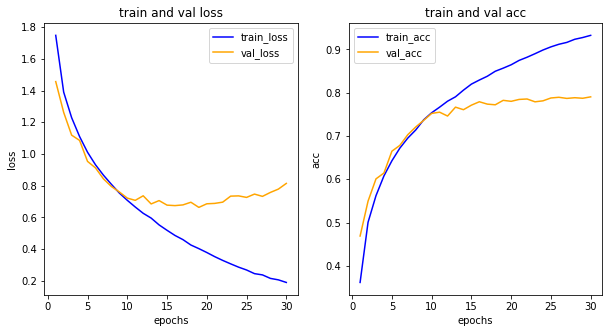

In [ ]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

# 출처
1.   밑바닥부터 시작하는 딥러닝 (사이토고지)
2.   백견불여일타 딥러닝 입문 with 텐서플로우 2.0 (조휘용)

